#Recurrent Neural Networks Sentiment Classifier

###Use RNN to classify IMDB movie reviews by their sentiment.

###Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


###Set hyperparameters

In [0]:
# output directory name:
output_dir = 'model_output/rnn'

# training:
epochs = 16 # way more!
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

# dense layer architecture: 
# n_dense = 256
# dropout = 0.2

###Load data

In [0]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

###Preprocess data

In [0]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

###Design neural network architecture

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


###Configure model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

###Train!

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 18s 733us/step - loss: 0.6812 - acc: 0.5440 - val_loss: 0.6437 - val_acc: 0.6074
Epoch 2/16
25000/25000 [==============================] - 17s 697us/step - loss: 0.5829 - acc: 0.6864 - val_loss: 0.8264 - val_acc: 0.5808
Epoch 3/16
 4736/25000 [====>.........................] - ETA: 11s - loss: 0.5216 - acc: 0.7361

25000/25000 [==============================] - 18s 700us/step - loss: 0.5292 - acc: 0.7298 - val_loss: 0.6600 - val_acc: 0.6243
Epoch 4/16
25000/25000 [==============================] - 18s 709us/step - loss: 0.4433 - acc: 0.7991 - val_loss: 0.4286 - val_acc: 0.8121
Epoch 5/16
15232/25000 [=================>............] - ETA: 5s - loss: 0.3534 - acc: 0.8502

25000/25000 [==============================] - 18s 717us/step - loss: 0.3688 - acc: 0.8428 - val_loss: 0.4354 - val_acc: 0.8033
Epoch 6/16
25000/25000 [==============================] - 18s 724us/step - loss: 0.3720 - acc: 0.8451 - val_loss: 0.5458 - val_acc: 0.7236
Epoch 7/16
17536/25000 [====================>.........] - ETA: 4s - loss: 0.3691 - acc: 0.8478

25000/25000 [==============================] - 18s 712us/step - loss: 0.3623 - acc: 0.8516 - val_loss: 0.4788 - val_acc: 0.7752
Epoch 8/16
25000/25000 [==============================] - 18s 703us/step - loss: 0.3044 - acc: 0.8794 - val_loss: 0.4451 - val_acc: 0.8105
Epoch 9/16
18176/25000 [====================>.........] - ETA: 3s - loss: 0.3592 - acc: 0.8372

25000/25000 [==============================] - 18s 700us/step - loss: 0.4166 - acc: 0.8018 - val_loss: 0.6037 - val_acc: 0.6661
Epoch 10/16
25000/25000 [==============================] - 17s 693us/step - loss: 0.4045 - acc: 0.8206 - val_loss: 0.5047 - val_acc: 0.7865
Epoch 11/16
18048/25000 [====================>.........] - ETA: 3s - loss: 0.4154 - acc: 0.8136

25000/25000 [==============================] - 17s 693us/step - loss: 0.3960 - acc: 0.8251 - val_loss: 0.5147 - val_acc: 0.7779
Epoch 12/16
25000/25000 [==============================] - 18s 703us/step - loss: 0.3097 - acc: 0.8784 - val_loss: 0.5157 - val_acc: 0.7963
Epoch 13/16
18048/25000 [====================>.........] - ETA: 3s - loss: 0.3382 - acc: 0.8643

25000/25000 [==============================] - 17s 695us/step - loss: 0.3511 - acc: 0.8562 - val_loss: 0.5166 - val_acc: 0.7806
Epoch 14/16
25000/25000 [==============================] - 18s 701us/step - loss: 0.3146 - acc: 0.8773 - val_loss: 0.5485 - val_acc: 0.7320
Epoch 15/16
18048/25000 [====================>.........] - ETA: 4s - loss: 0.3050 - acc: 0.8806

25000/25000 [==============================] - 18s 707us/step - loss: 0.3125 - acc: 0.8776 - val_loss: 0.5116 - val_acc: 0.7716
Epoch 16/16
25000/25000 [==============================] - 18s 704us/step - loss: 0.3061 - acc: 0.8809 - val_loss: 0.5790 - val_acc: 0.7748


###Evaluate

In [0]:
model.load_weights(output_dir+"/weights.03.hdf5") # zero-indexed

In [0]:
y_hat = model.predict_proba(x_valid)

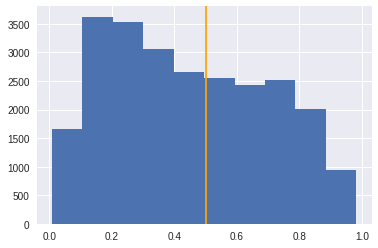

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [13]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'69.26'